In [10]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("elemento/nyc-yellow-taxi-trip-data")
# print("Path to dataset files:", path) use only for debug
file_path1 = os.path.join(path, "yellow_tripdata_2015-01.csv")  # Path to the dataset file
file_path2 = os.path.join(path, "yellow_tripdata_2016-01.csv")  # Path to the dataset file
file_path3 = os.path.join(path, "yellow_tripdata_2016-02.csv")  # Path to the dataset file
file_path4 = os.path.join(path, "yellow_tripdata_2016-03.csv")  # Path to the dataset file

Path to dataset files: /home/nicola/.cache/kagglehub/datasets/elemento/nyc-yellow-taxi-trip-data/versions/2


# Update and change the column name in first dataset

In [2]:
def update_and_change(file_path):
    df = pd.read_csv(file_path)
    # Update the column name
    if 'RatecodeID' in df.columns:
        df.rename(columns={'RateCodeID': 'RatecodeID'}, inplace=True)
    return df

df_2015_01 = update_and_change(file_path1)

name of the columns in the dataset

In [5]:
# Check if the file exists
if os.path.exists(file_path1):
    # upload the file to the notebook
    df = pd.read_csv(file_path1)

    # Print the colum names
    print("Nomi delle colonne nel dataset:", df.columns.tolist())
else:
    print("Il file non esiste. Controlla il percorso:", file_path1)


Nomi delle colonne nel dataset: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']


Union of the dataset and creation of the bar plot for the frequency of the VendorID

In [9]:
vendor_colum = ['VendorID']
df_2015_01 = pd.read_csv(file_path1, usecols=vendor_colum)    # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=vendor_colum)    # Load the dataset  in a DataFrame
df_2016_02 = pd.read_csv(file_path3, usecols=vendor_colum)    # Load the dataset  in a DataFrame
df_2016_03 = pd.read_csv(file_path4, usecols=vendor_colum)    # Load the dataset  in a DataFrame

# Concatenate the dataframes
df = pd.concat([df_2015_01, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

Creation of the bar plot for the frequency of the VendorID

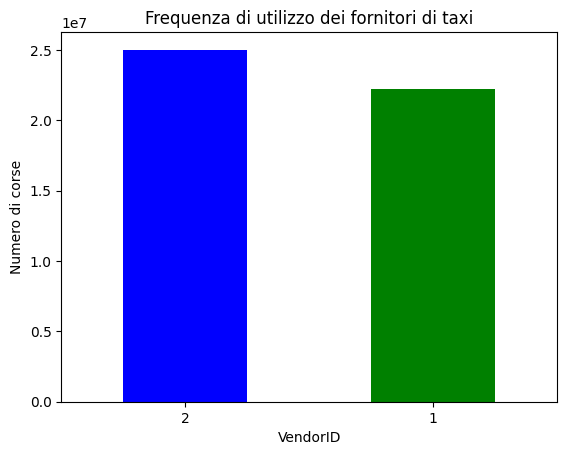

In [8]:
fr_vendor = df['VendorID'].value_counts()

# creation of the bar plot
fr_vendor.plot(kind='bar', color=['blue', 'green'])

# add title and labels
plt.title("frequency of VendorID")
plt.xlabel("VendorID")
plt.ylabel("Number of trips")
plt.xticks(rotation=0)

# show the plot
plt.show()

In [6]:
# union in a single csv only with the column RateCodeID
colum_rate = ['RatecodeID'] 
df_2015_01_filtered = df_2015_01[['RateCodeID']]    # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=colum_rate)    # Load the dataset  in a DataFrame
df_2016_02 = pd.read_csv(file_path3, usecols=colum_rate)    # Load the dataset  in a DataFrame
df_2016_03 = pd.read_csv(file_path4, usecols=colum_rate)    # Load the dataset  in a DataFrame


In [7]:
df=pd.concat([df_2015_01_filtered, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

Creation of the bar plot for the frequency of the RateCodeID

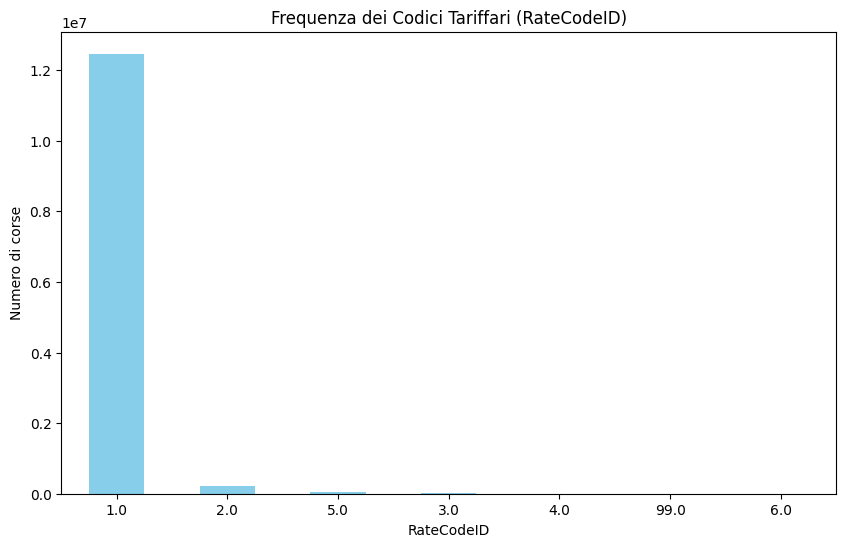

RateCodeID
1.0     12464898
2.0       224723
5.0        36896
3.0        17700
4.0         4128
99.0         507
6.0          134
Name: count, dtype: int64


In [8]:
# Count the frequency of each RateCodeID
frequent_rate_id = df['RateCodeID'].value_counts()

# create the bar plot
plt.figure(figsize=(10, 6))
frequent_rate_id.plot(kind='bar', color='skyblue')

# add title and labels
plt.title("Frequenza dei Codici Tariffari (RateCodeID)")
plt.xlabel("RateCodeID")
plt.ylabel("Numero di corse")
plt.xticks(rotation=0)
#show the plot
plt.show()


print(frequent_rate_id)